# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | conde
Processing Record 4 of Set 1 | torghay
Processing Record 5 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | dzuunmod
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | taulaga
Processing Record 16 of Set 1 | hammerfest
Processing Record 17 of Set 1 | say
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 

Processing Record 41 of Set 4 | padang
Processing Record 42 of Set 4 | bardsir
Processing Record 43 of Set 4 | laguna
Processing Record 44 of Set 4 | iskateley
Processing Record 45 of Set 4 | margate
Processing Record 46 of Set 4 | nchelenge
Processing Record 47 of Set 4 | tsaratanana
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | bama
Processing Record 0 of Set 5 | zalingei
Processing Record 1 of Set 5 | altinoluk
City not found. Skipping...
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | crane
Processing Record 5 of Set 5 | ta`u
Processing Record 6 of Set 5 | la ronge
Processing Record 7 of Set 5 | olinda
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | invercargill
Processing Record 10 of Set 5 | saynshand
Processing Record 11 of Set 5 | zhanaozen
Processing Record 12 of Set 5 | nova sintra
Processing Record 13 of Set 5 | tazovsky
Processing Record 14 of Set 5 | 

Processing Record 30 of Set 8 | novodvinsk
Processing Record 31 of Set 8 | jiuquan
Processing Record 32 of Set 8 | conel
Processing Record 33 of Set 8 | walvis bay
Processing Record 34 of Set 8 | reggane
Processing Record 35 of Set 8 | noosa heads
Processing Record 36 of Set 8 | quellon
Processing Record 37 of Set 8 | inyonga
Processing Record 38 of Set 8 | talcahuano
Processing Record 39 of Set 8 | gisborne
Processing Record 40 of Set 8 | cidreira
Processing Record 41 of Set 8 | port glaud
City not found. Skipping...
Processing Record 42 of Set 8 | baiti
Processing Record 43 of Set 8 | al kharijah
Processing Record 44 of Set 8 | fougamou
Processing Record 45 of Set 8 | villeneuve-sur-lot
Processing Record 46 of Set 8 | axim
Processing Record 47 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 48 of Set 8 | coquimbo
Processing Record 49 of Set 8 | lincheng
Processing Record 0 of Set 9 | maffra
Processing Record 1 of Set 9 | chibougamau
Processing Record 2 of Set 9 | 

City not found. Skipping...
Processing Record 25 of Set 12 | loukhi
Processing Record 26 of Set 12 | urengoy
Processing Record 27 of Set 12 | kisangani
Processing Record 28 of Set 12 | lugovoye
Processing Record 29 of Set 12 | newman
Processing Record 30 of Set 12 | atar
Processing Record 31 of Set 12 | chuzhou
Processing Record 32 of Set 12 | kendari
Processing Record 33 of Set 12 | diawara
Processing Record 34 of Set 12 | constitucion
Processing Record 35 of Set 12 | minas de marcona
Processing Record 36 of Set 12 | cantemir
Processing Record 37 of Set 12 | thomaston
Processing Record 38 of Set 12 | bafq
Processing Record 39 of Set 12 | santana
Processing Record 40 of Set 12 | ierapetra
Processing Record 41 of Set 12 | peruibe
Processing Record 42 of Set 12 | colon
Processing Record 43 of Set 12 | montevideo
Processing Record 44 of Set 12 | kirakira
Processing Record 45 of Set 12 | semporna
Processing Record 46 of Set 12 | nabire
Processing Record 47 of Set 12 | hailar
--------------

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,279.98,98,100,5.09,SJ,1691700974
1,iqaluit,63.7506,-68.5145,282.00,87,40,5.14,CA,1691701005
2,conde,-7.2597,-34.9075,297.85,78,20,4.12,BR,1691701463
3,torghay,49.6339,63.4981,294.76,55,31,6.09,KZ,1691701463
4,longyearbyen,78.2186,15.6401,283.06,81,100,1.03,SJ,1691700988


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,279.98,98,100,5.09,SJ,1691700974
1,iqaluit,63.7506,-68.5145,282.00,87,40,5.14,CA,1691701005
2,conde,-7.2597,-34.9075,297.85,78,20,4.12,BR,1691701463
3,torghay,49.6339,63.4981,294.76,55,31,6.09,KZ,1691701463
4,longyearbyen,78.2186,15.6401,283.06,81,100,1.03,SJ,1691700988


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

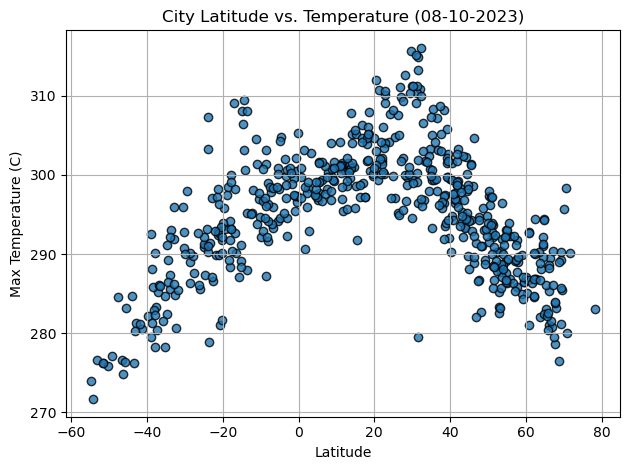

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime. now()
date = date.strftime("%m-%d-%Y")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

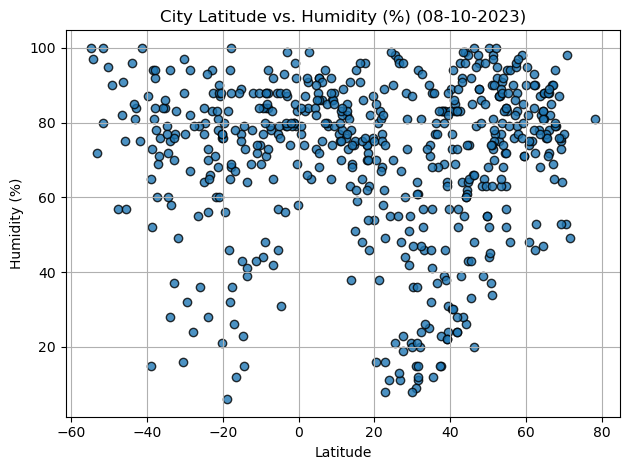

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

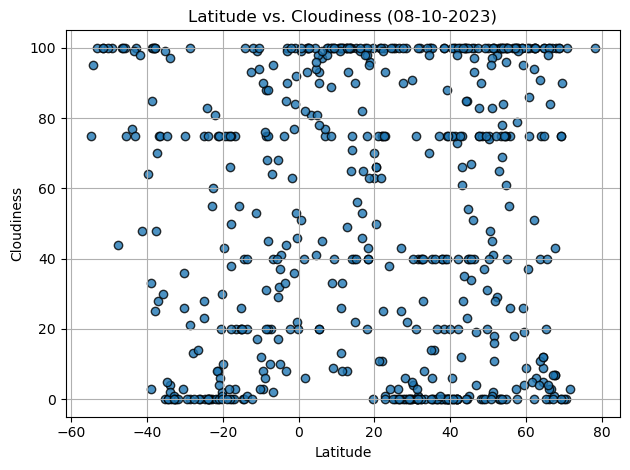

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,279.98,98,100,5.09,SJ,1691700974
1,iqaluit,63.7506,-68.5145,282.00,87,40,5.14,CA,1691701005
3,torghay,49.6339,63.4981,294.76,55,31,6.09,KZ,1691701463
4,longyearbyen,78.2186,15.6401,283.06,81,100,1.03,SJ,1691700988
8,yellowknife,62.4560,-114.3525,294.44,46,100,1.54,CA,1691700973


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,conde,-7.2597,-34.9075,297.85,78,20,4.12,BR,1691701463
5,grytviken,-54.2811,-36.5092,271.64,97,95,3.29,GS,1691700973
6,puerto natales,-51.7236,-72.4875,276.17,80,100,2.81,CL,1691700976
7,port-aux-francais,-49.3500,70.2167,277.08,90,100,14.89,TF,1691700979
9,blackmans bay,-43.0167,147.3167,281.22,84,100,3.22,AU,1691700976


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6736457994270355


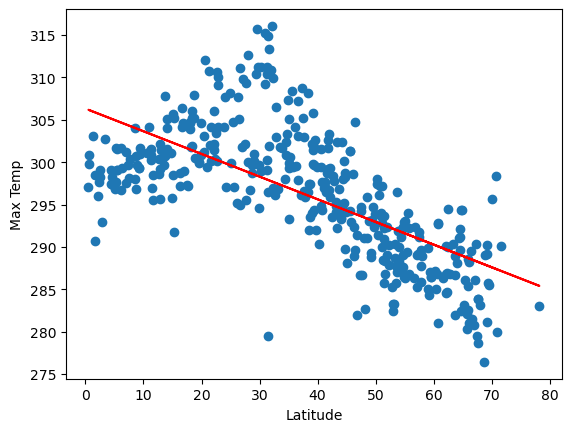

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.7848592185096356


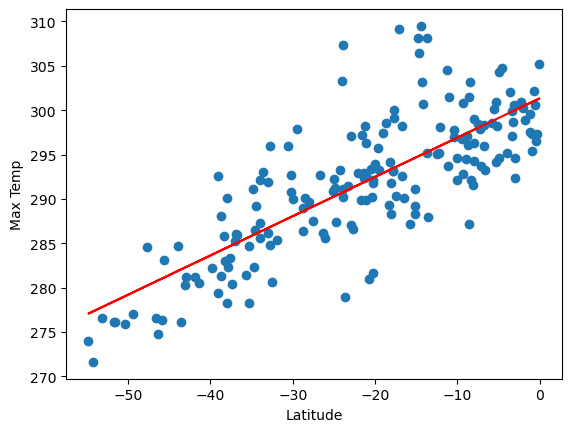

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** the closer the latitude and longitude get to zero, the higher the temperature. this expresses itself as a negative correlation in the northern hemisphere and as positive in the southern hemisphere.As the lattitude gets farther away from zero, the max temp decreases. there is a strong correlation between these values

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.06048814060028314


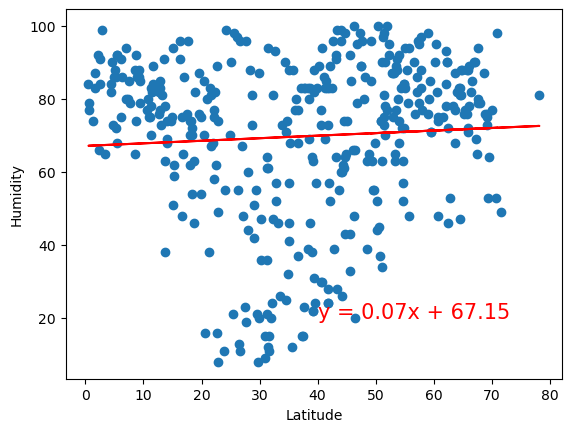

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is -0.056334270777091064


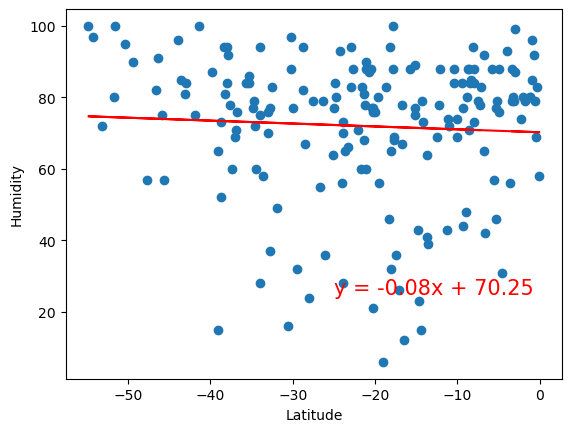

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** with a very low r value, there is not a strong linear correlation between humidity and latidute. we cannot predict what the humidity will be based on an area's latitide. this is true for both the northern and southern hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.1329606529077196


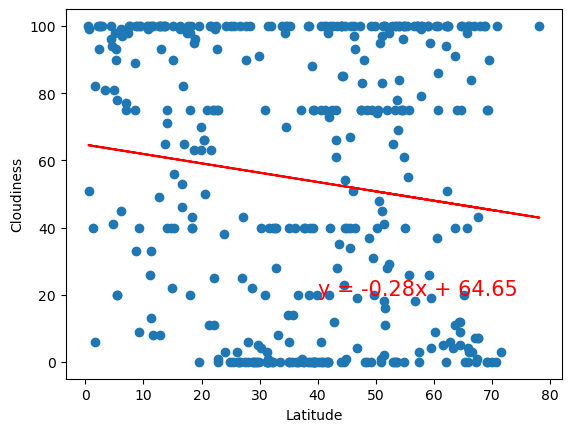

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is -0.14557727525406683


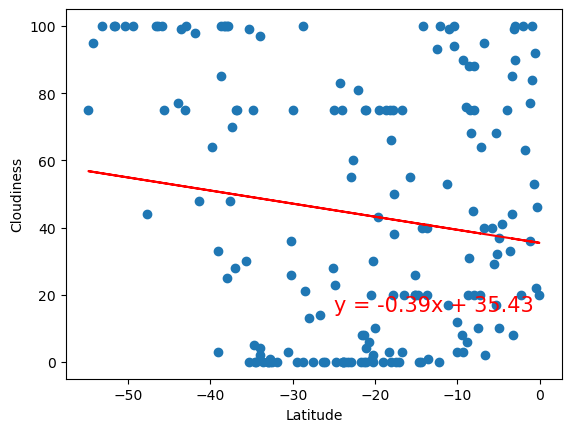

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** there is a slight negative correlation between cloudiness and latitude in both the northern and southern hemispheres. this is interesting because you would expect data from the northern and southern hemispheres to be inverse of each other. as the latitiude increases, in both hemispheres, there is a slight chance that the weather will be less cloudy. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.12300945927641828


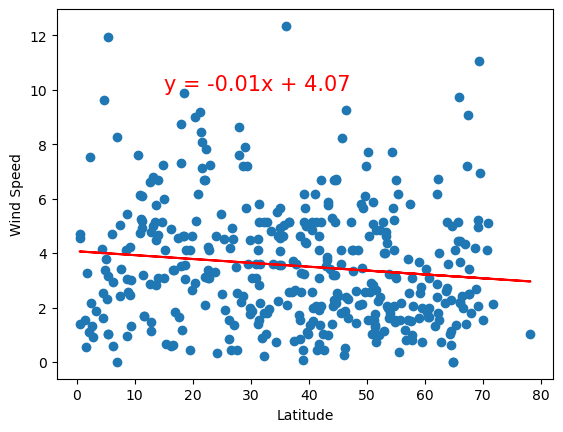

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.05819924503280033


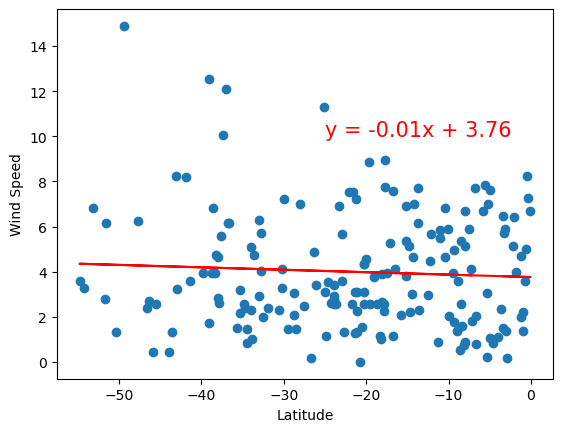

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** there is very little correlation between wind speed and latitude in both the northern and southern hemisphere, with r values of -.12 and -.06 respectively. it is difficult to predict wind speed based on latitude, though there is a stronger correlation in the northern hemisphere. 